In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('BitcoinHeistData.csv')

# Display the dataframe
print(df)

# Display the info of the dataframe
df.info()

# Define the target variable and features
y = df['label'].values
x_data = df.drop(['label', 'address'], axis=1)  # 'address' is dropped because it's a string

# Normalize the data
# x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x = (x_data - np.min(x_data, axis=0)) / (np.max(x_data, axis=0) - np.min(x_data, axis=0))

# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=300)

# Use SGD Classifier
from sklearn.metrics import classification_report

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

# print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print('accuracy: {:.4f}'.format(sgd.score(x_test, y_test)))


                                    address  year  day  length     weight  \
0         111K8kZAEnJg245r2cM6y9zgJGHZtJPy6  2017   11      18   0.008333   
1        1123pJv8jzeFQaCV4w644pzQJzVWay2zcA  2016  132      44   0.000244   
2        112536im7hy6wtKbpH1qYDWtTyMRAcA2p7  2016  246       0   1.000000   
3        1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7  2016  322      72   0.003906   
4        1129TSjKtx65E35GiUo4AYVeyo48twbrGX  2016  238     144   0.072848   
...                                     ...   ...  ...     ...        ...   
2916692  12D3trgho1vJ4mGtWBRPyHdMJK96TRYSry  2018  330       0   0.111111   
2916693  1P7PputTcVkhXBmXBvSD9MJ3UYPsiou1u2  2018  330       0   1.000000   
2916694  1KYiKJEfdJtap9QX2v9BXJMpz2SfU4pgZw  2018  330       2  12.000000   
2916695  15iPUJsRNZQZHmZZVwmQ63srsmughCXV4a  2018  330       0   0.500000   
2916696  3LFFBxp15h9KSFtaw55np8eP5fv6kdK17e  2018  330     144   0.073972   

         count  looped  neighbors        income            label  
0       

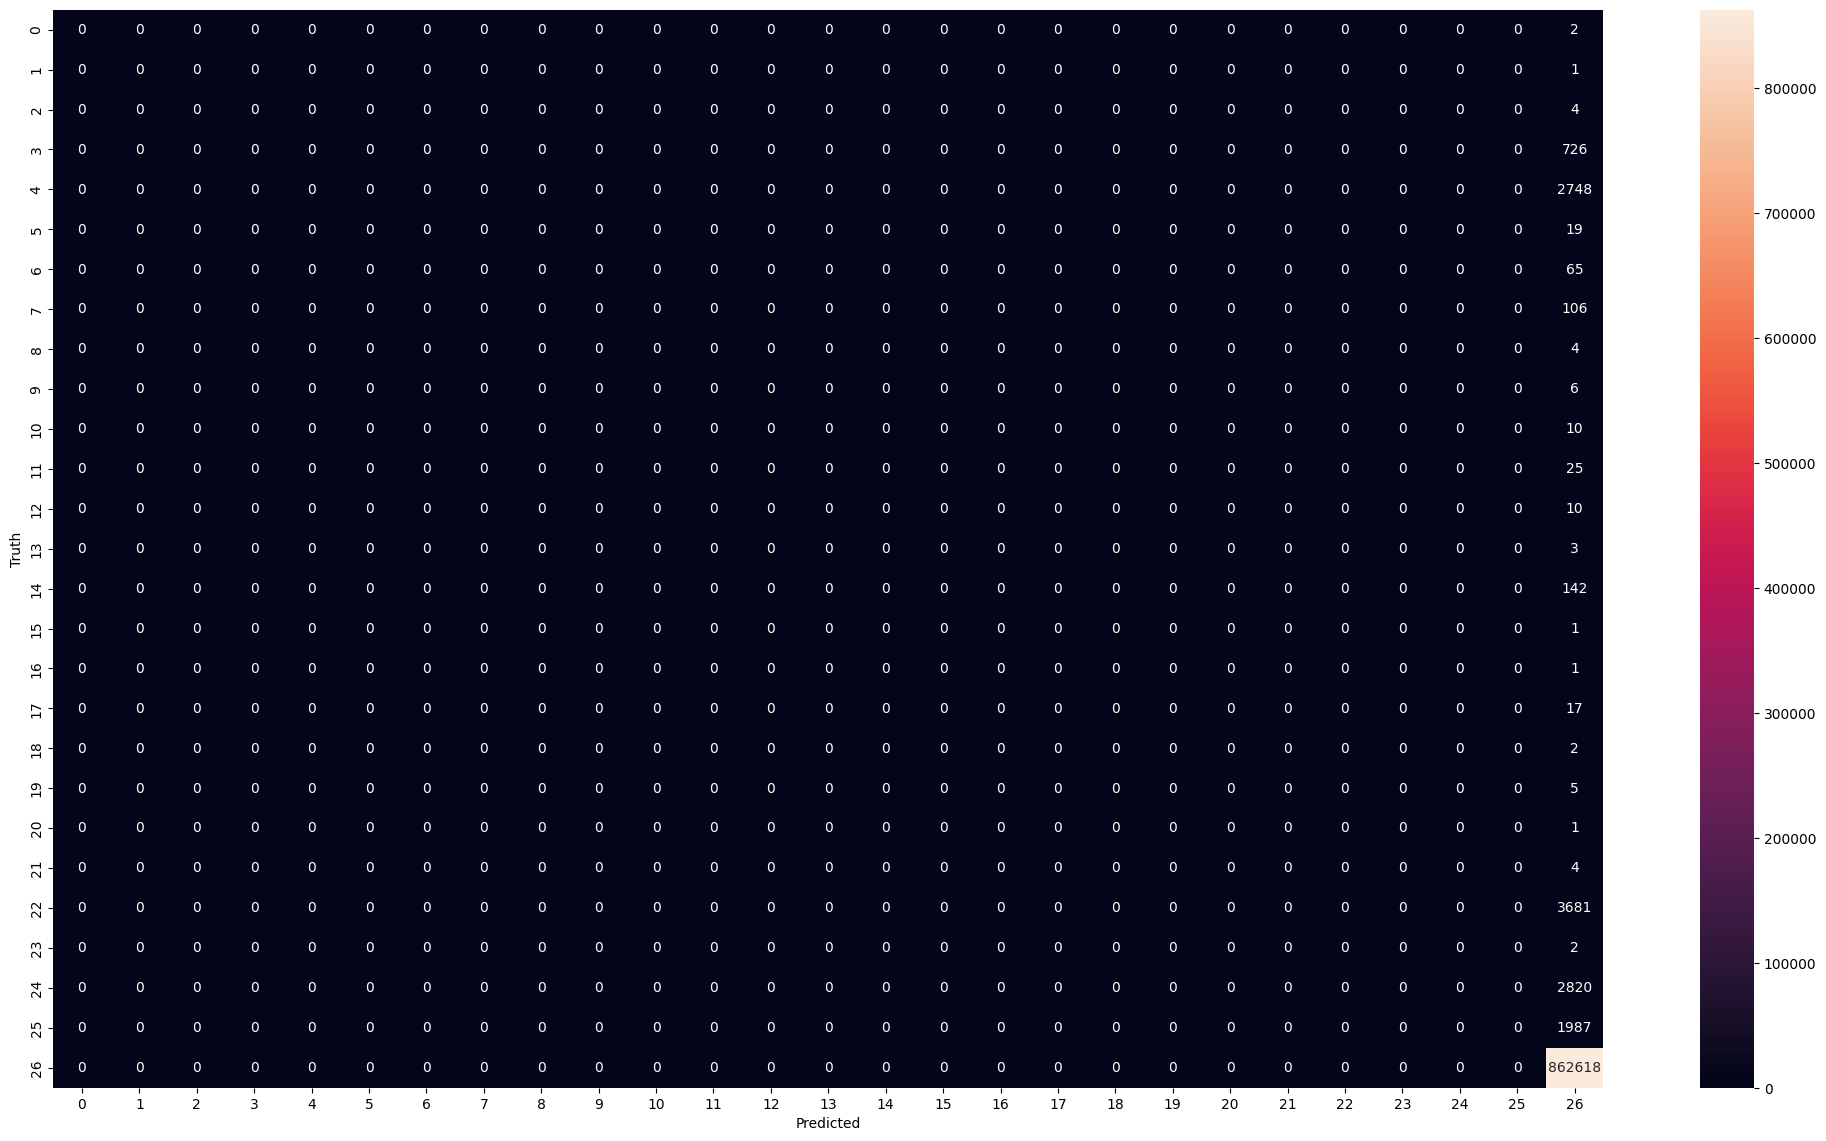

Confusion Matrix:
[[     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      2]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      1]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      4]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0    726]
 [     0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0      0      0      0      0
       0      0      0      0      0      0   2748]
 [

In [3]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(25,14))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)